In [98]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D
import matplotlib.pyplot as plt

In [143]:
train = pd.read_csv('fashion-mnist_train.csv')
test = pd.read_csv('fashion-mnist_test.csv')
x_train = train.drop(['label'],axis=1)
y_train = train['label']
x_test = test.drop(['label'],axis=1)
y_test = test['label']
x_test

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,9,8,0,...,103,87,56,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,14,53,99,17,...,0,0,0,0,63,53,31,0,0,0
3,0,0,0,0,0,0,0,0,0,161,...,137,126,140,0,133,224,222,56,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,37,...,32,23,14,20,0,0,1,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,0,1,3,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [103]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape the input data to the required shape (28, 28, 1)
x_train_reshaped = x_train.values.reshape(-1, 28, 28, 1)
x_test_reshaped = x_test.values.reshape(-1, 28, 28, 1)


In [146]:
labels = ['t-shirt','trouser','pullover','dress','coat','sandal','sneakers','shirt','bag','ankle boots']

pullover


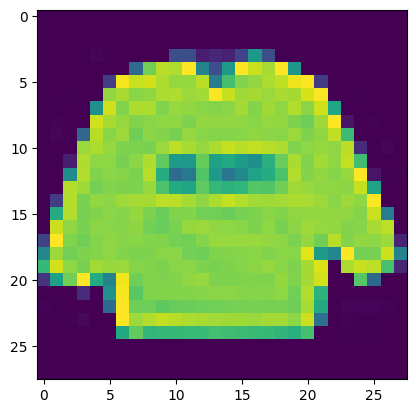

ankle boots


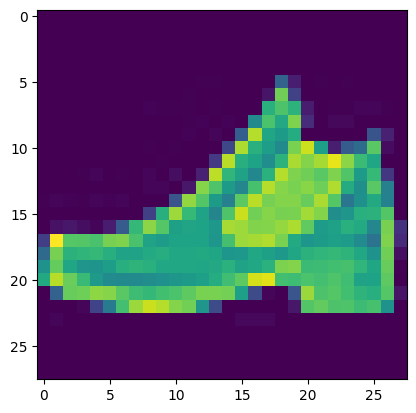

sneakers


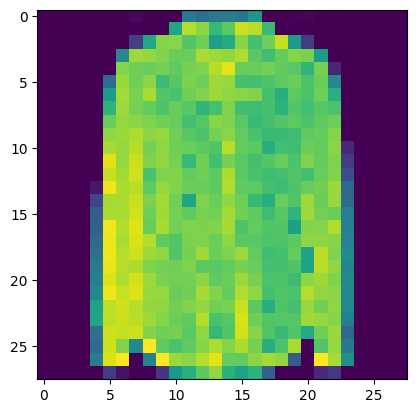

t-shirt


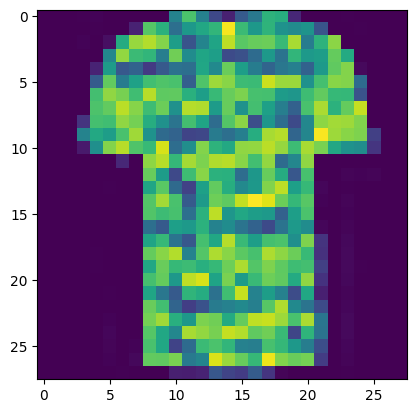

dress


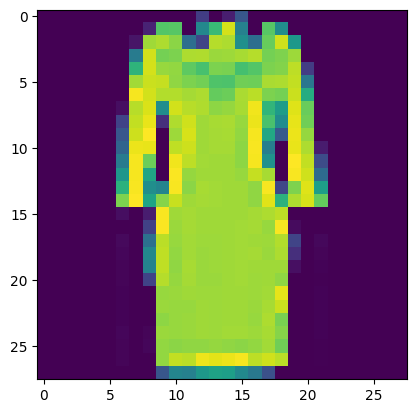

coat


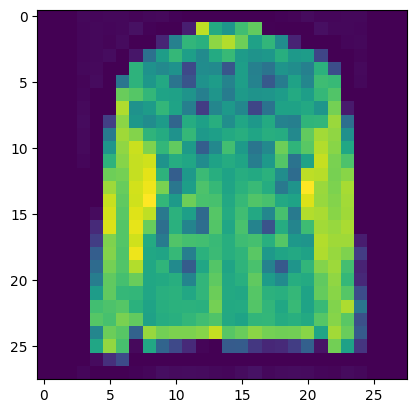

coat


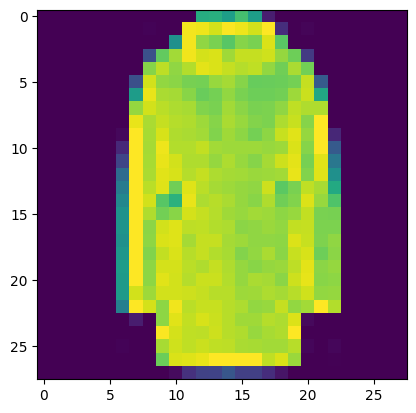

sandal


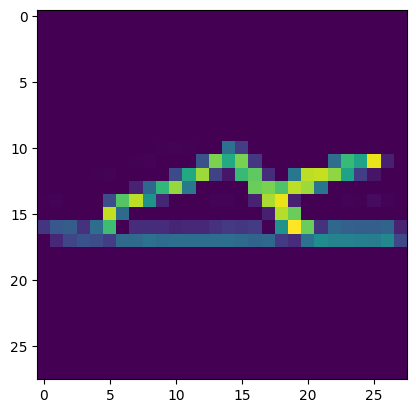

coat


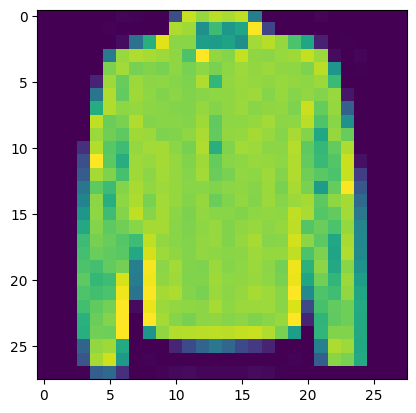

bag


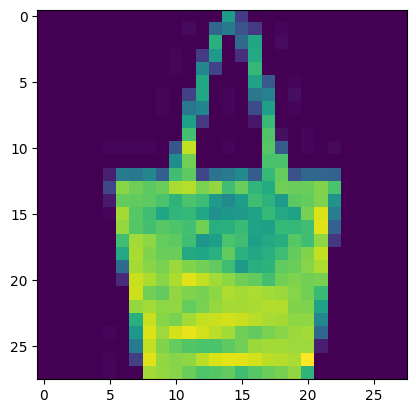

In [147]:
for i in range(10):
    print(labels[y_train[i]])
    plt.imshow(x_train_reshaped[i])
    plt.show()

In [106]:
model = Sequential()

In [107]:
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()

C:\Users\SUYOG\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 10816)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       1,384,576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,386,506 (5.29 MB)

 Trainable params: 1,386,506 (5.29 MB)

 Non-trainable params: 0 (0.00 B)

In [108]:
model.fit(x_train_reshaped, y_train, epochs=5, batch_size=32, validation_data=(x_test_reshaped, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 49s 26ms/step - accuracy: 0.5361 - loss: 1.3145 - val_accuracy: 0.7468 - val_loss: 0.6390
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 48s 26ms/step - accuracy: 0.7797 - loss: 0.5884 - val_accuracy: 0.8134 - val_loss: 0.5239
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 48s 26ms/step - accuracy: 0.8152 - loss: 0.5096 - val_accuracy: 0.8336 - val_loss: 0.4784
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 45s 24ms/step - accuracy: 0.8348 - loss: 0.4633 - val_accuracy: 0.8494 - val_loss: 0.4355
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 45s 24ms/step - accuracy: 0.8448 - loss: 0.4325 - val_accuracy: 0.8550 - val_loss: 0.4199


In [109]:
loss,acc = model.evaluate(x_test_reshaped,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8552 - loss: 0.4199


In [138]:
predictions = model.predict(x_test_reshaped[:1])
predictions


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


array([[7.5265616e-01, 1.4788873e-06, 4.6156414e-04, 1.4740881e-03,
        1.8585863e-04, 7.8643802e-12, 2.4488430e-01, 4.8004830e-15,
        3.3651860e-04, 2.8327471e-15]], dtype=float32)

In [139]:
label = labels[np.argmax(predictions[0])]
label

't-shirt'

t-shirt


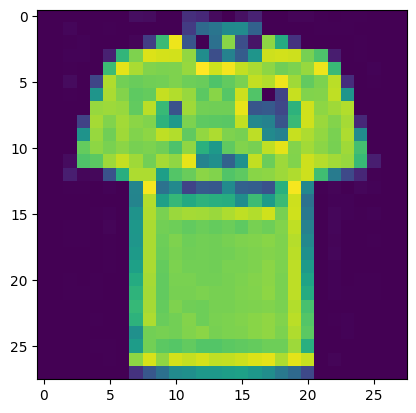

In [149]:
print(label)
plt.imshow(x_test_reshaped[:1][0])
plt.show()